# MATH 210 Introduction to Mathematical Computing

**March 20, 2024**

In [1]:
import numpy as np
import matplotlib.pyplot as plt

## Linear Algebra with SciPy and NumPy

The main Python package for linear algebra computations is `scipy.linalg`. There is also `numpy.linalg` which is very similar. We choose `scipy.linalg`.

In [2]:
import scipy.linalg as la

## Construct Matrices using NumPy

Create a matrix of zeros:

In [3]:
np.zeros((4,5))

array([[0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.]])

Create a matrix of ones:

In [4]:
np.ones((3,2))

array([[1., 1.],
       [1., 1.],
       [1., 1.]])

Create a diagonal matrix from a vector:

In [5]:
v = np.array([1.,2.,3.])
M = np.diag(v)
M

array([[1., 0., 0.],
       [0., 2., 0.],
       [0., 0., 3.]])

Notice that all these matrices have floating point entries (as opposed to integers).

In [6]:
M.dtype

dtype('float64')

Create the identity matrix:

In [7]:
np.eye(10)

array([[1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]])

Create a square matrix of size $N$ with -2 on the diagonal and 1 on the upper and lower diagonals:

In [8]:
N = 50
A1 = -2*np.eye(N)
A2 = np.diag(np.ones(N-1),1)
A3 = np.diag(np.ones(N-1),-1)
A = A1 + A2 + A3
print(A)

[[-2.  1.  0. ...  0.  0.  0.]
 [ 1. -2.  1. ...  0.  0.  0.]
 [ 0.  1. -2. ...  0.  0.  0.]
 ...
 [ 0.  0.  0. ... -2.  1.  0.]
 [ 0.  0.  0. ...  1. -2.  1.]
 [ 0.  0.  0. ...  0.  1. -2.]]


Use `plt.imshow` to plot a matrix where each entry is assigned a color based on its value.

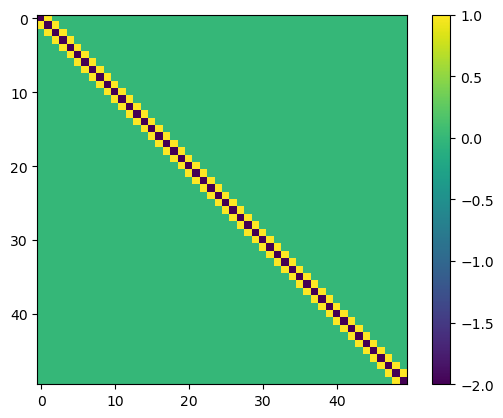

In [9]:
plt.imshow(A), plt.colorbar()
plt.show()

## Matrix Multiplication

Use the symbol `@` to perform matrix multiplication:

In [10]:
A = np.array([[1.,1.],[-1.,1.]])
print(A)

[[ 1.  1.]
 [-1.  1.]]


In [11]:
x = np.array([[2.],[5.]])
print(x)

[[2.]
 [5.]]


In [12]:
A@x

array([[7.],
       [3.]])

In [13]:
N = 5
A1 = -2*np.eye(N)
A2 = np.diag(np.ones(N-1),1)
A3 = np.diag(np.ones(N-1),-1)
A = A1 + A2 + A3
print(A)

[[-2.  1.  0.  0.  0.]
 [ 1. -2.  1.  0.  0.]
 [ 0.  1. -2.  1.  0.]
 [ 0.  0.  1. -2.  1.]
 [ 0.  0.  0.  1. -2.]]


In [14]:
x = np.ones((N,1))
print(x)

[[1.]
 [1.]
 [1.]
 [1.]
 [1.]]


In [15]:
A@x

array([[-1.],
       [ 0.],
       [ 0.],
       [ 0.],
       [-1.]])

Note that we can use `A@x` when `x` is 1-dimensional. The result is as if  `A@x` with `x` as a column vector but we return it as a 1-dimensional NumPy array.

In [35]:
A = np.array([[1.,1.,0.],[1.,-1.,1.],[0.,1.,1]])
A

array([[ 1.,  1.,  0.],
       [ 1., -1.,  1.],
       [ 0.,  1.,  1.]])

In [36]:
x = np.array([1.,-1.,0.])
x

array([ 1., -1.,  0.])

In [44]:
A@x

array([ 0.,  2., -1.])

In [41]:
x.ndim

1

In [42]:
A.ndim

2

In [43]:
A.shape

(3, 3)

In [45]:
y = np.array([[1.,-1.,0.]])
y

array([[ 1., -1.,  0.]])

In [46]:
y.ndim

2

In [47]:
y.shape

(1, 3)

In [48]:
A@y

ValueError: matmul: Input operand 1 has a mismatch in its core dimension 0, with gufunc signature (n?,k),(k,m?)->(n?,m?) (size 1 is different from 3)

A 2-dimensional NumPy array is like a list of lists of numbers. To access a values, we need to specify 2 indices. For example:

In [53]:
y[0]

array([ 1., -1.,  0.])

In [49]:
A = [[1,2],[4,7]]
A

[[1, 2], [4, 7]]

In [51]:
A[1][1]

7

## Solving Equations

The function `scipy.linalg.solve(A,b)` computes the solution of $A \mathbf{x} = \mathbf{b}$ where $A$ is n by n matrix and $\mathbf{b} \in \mathbb{R}^n$.

In [54]:
A = np.array([[1.,1.],[-1.,1.]])
b = np.array([[1.],[2.]])
x = la.solve(A,b)
x

array([[-0.5],
       [ 1.5]])

Verify $A \mathbf{x} = \mathbf{b}$:

In [55]:
A@x

array([[1.],
       [2.]])

In [76]:
N = 100
A1 = -2*np.eye(N)
A2 = np.diag(np.ones(N-1),1)
A3 = np.diag(np.ones(N-1),-1)
A = A1 + A2 + A3

In [77]:
b = np.ones(N)

In [78]:
x = la.solve(A,b)

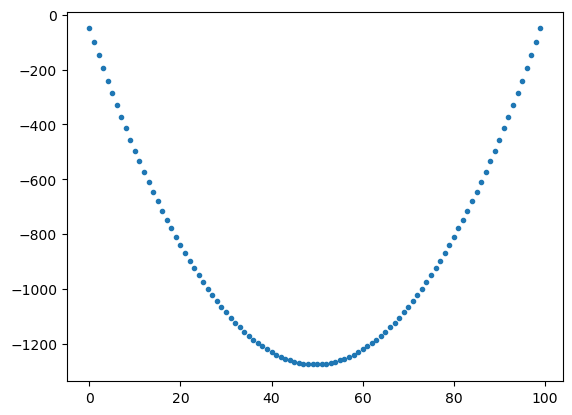

In [79]:
plt.plot(x,'.')
plt.show()

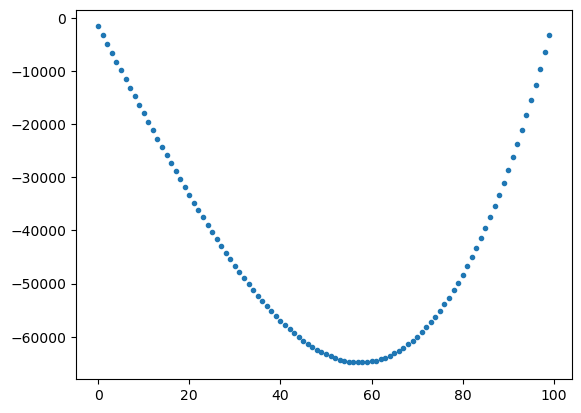

In [81]:
N = 100
A1 = -2*np.eye(N)
A2 = np.diag(np.ones(N-1),1)
A3 = np.diag(np.ones(N-1),-1)
A = A1 + A2 + A3
b = np.arange(N)
x = la.solve(A,b)
plt.plot(x,'.')
plt.show()

How does `la.solve` work? It uses a FORTRAN library called LAPACK and it does row operations to reduce the matrix $A$ to row echelon form just like we do in MATH 221! See https://www.netlib.org/lapack/lug/node38.html.